# Trabajo práctico integrador: Aprendizaje de maquinas 1

Integrantes:
- Julio Agustín Donadello (a1505)
- Diego Braga (a1522)
- Eduardo Echeverria (a1516)
- Marco Joel Isidro (a1520)
- Diego Sarina (a1519)

# Introducción

Para el presente trabajo se utilizó un dataset sobre el clima en Australia, el cual contiene información sobre diferentes ciudades de Australia durante 10 años, incluyendo datos como la temperatura, la velocidad y dirección del viento, las precipitaciones, entre otros.

Dataset utilizado: [Kaggle - Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data)

El dataset contiene las siguientes columnas:
* **Date:** fecha de la observación.
* **Location:** nombre de la ubicación de la estación meteorológica.
* **MinTemp:** temperatura mínima en grados Celsius.
* **MaxTemp:** temperatura máxima en grados Celsius.
* **Rainfall:** precipitaciones durante el día en mm.
* **Evaporation:** evaporación en mm durante 24h hasta las 9am.
* **Sunshine:** horas de sol en el día.
* **WindGustDir:** dirección de la ráfaga de viento más fuerte.
* **WindGustSpeed:** velocidad de la ráfaga de viento más fuerte en km/h.
* **WindDir9am:** dirección del viento a las 9am.
* **WindDir3pm:** dirección del viento a las 3pm.
* **WindSpeed9am:** velocidad del viento promediando los 10 minutos previos a las 9am en km/h.
* **WindSpeed3pm:** velocidad del viento promediando los 10 minutos previos a las 3pm en km/h.
* **Humidity9am:** humedad a las 9am en porcentaje.
* **Humidity3pm:** humedad a las 3pm en porcentaje.
* **Pressure9am:** presión a las 9am en hpa.
* **Pressure3pm:** presión a las 3pm en hpa.
* **Cloud9am:** Fracción del cielo cubierta por nubes a las 9am en oktas.
* **Cloud3pm:** Fracción del cielo cubierta por nubes a las 3pm en oktas.
* **Temp9am:** temperatura a las 9am en grados Celsius.
* **Temp3pm:** temperatura a las 3pm en grados Celsius.
* **RainToday:** si llovió hoy más de 1mm durante 24h hasta las 9am.
* **RainTomorrow:** si lloverá mañana.

Un dato importante a la hora de realizar el análisis exploratorio, la limpieza y la preparación de los datos es el objetivo que se busca alcanzar con el análisis. En este caso, el objetivo es predecir si lloverá al día siguiente o no, en función de los datos meteorológicos del día actual.

Antes de comenzar se importan todas las librerías necesarias con el objetivo de brindar claridad al código y facilitar su lectura.



**NOTA**: Utilizamos el mismo dataset para la materia "Analisis de Datos", en el cual nos familizariamos con el dataset, sus features, hicimos el analisis exploratorio, etc. Para esta oportunidad, tomaremos el dataset ya corregido que se encuentra en:

```
├── dataset
│   └── weatherAUS.csv
│   └── weather_corregido.csv
```

In [111]:
#generales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import scipy.stats as stats

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

import time
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')
#configuraciones generales
pd.set_option('display.max_columns', None)

# Verificación de la correcta carga del dataset

In [3]:
#carga de los datos
weather_df = pd.read_csv("./dataset/dataset_corregido.csv")

#cantidad de elementos en el dataset
print(weather_df.shape)

(142193, 29)


In [4]:
# Visualizacion de las primeras 10 filas
weather_df.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day,Latitude,Longitude,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos
0,13.4,22.9,0.6,9.48,9.88,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,1.8,16.9,21.8,0,0,12,2008,1,-36.0737,146.9135,-1.000000,-1.836970e-16,-1.000000e+00,-1.836970e-16,-0.923880,3.826834e-01
1,7.4,25.1,0.0,7.84,10.28,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.8,2.8,17.2,24.3,0,0,12,2008,2,-36.0737,146.9135,-0.923880,3.826834e-01,-3.826834e-01,9.238795e-01,-0.923880,-3.826834e-01
2,12.9,25.7,0.0,7.92,12.14,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.8,2.0,21.0,23.2,0,0,12,2008,3,-36.0737,146.9135,-0.923880,-3.826834e-01,-1.000000e+00,-1.836970e-16,-0.923880,-3.826834e-01
3,9.2,28.0,0.0,5.76,10.86,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.8,2.0,18.1,26.5,0,0,12,2008,4,-36.0737,146.9135,0.707107,7.071068e-01,7.071068e-01,-7.071068e-01,1.000000,6.123234e-17
4,17.5,32.3,1.0,6.00,8.44,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,2008,5,-36.0737,146.9135,-1.000000,-1.836970e-16,9.238795e-01,3.826834e-01,-0.707107,7.071068e-01
5,14.6,29.7,0.2,7.92,10.72,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,4.4,4.0,20.6,28.9,0,0,12,2008,6,-36.0737,146.9135,-0.923880,3.826834e-01,-1.000000e+00,-1.836970e-16,-1.000000,-1.836970e-16
6,14.3,25.0,0.0,9.56,12.22,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,1.4,18.1,24.6,0,0,12,2008,7,-36.0737,146.9135,-1.000000,-1.836970e-16,-7.071068e-01,-7.071068e-01,-1.000000,-1.836970e-16
7,7.7,26.7,0.0,6.24,10.32,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,1.4,3.8,16.3,25.5,0,0,12,2008,8,-36.0737,146.9135,-1.000000,-1.836970e-16,3.826834e-01,-9.238795e-01,-1.000000,-1.836970e-16
8,9.7,31.9,0.0,10.60,9.86,73.5,7.0,28.0,42.0,9.0,1008.9,1003.6,2.4,3.4,18.3,30.2,0,1,12,2008,9,-36.0737,146.9135,-0.382683,9.238795e-01,7.071068e-01,-7.071068e-01,-0.707107,7.071068e-01
9,13.1,30.1,1.4,7.44,10.32,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,1.8,2.8,20.1,28.2,1,0,12,2008,10,-36.0737,146.9135,-1.000000,-1.836970e-16,1.224647e-16,-1.000000e+00,0.382683,-9.238795e-01


In [4]:
weather_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day,Latitude,Longitude,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos
count,142193.000000,142193.000000,142193.000000,142193.000000,1.421930e+05,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,1.421930e+05,142193.000000,1.421930e+05,142193.000000,1.421930e+05
mean,12.189307,23.230659,2.086360,5.036038,7.460096e+00,39.745423,13.889312,18.478234,69.007328,51.551311,1017.757111,1015.346671,4.427065,4.474846,16.964937,21.720343,0.221305,0.224181,6.402544,2012.758926,15.715084,-32.756418,142.088448,-0.033483,-5.555817e-02,0.013028,2.146866e-02,-0.017099,-4.611899e-02
std,6.400692,7.097391,5.987946,3.124743,3.515770e+00,12.559388,8.571594,8.509579,18.880984,20.697823,6.854832,6.795818,2.619236,2.426317,6.498296,6.938985,0.415127,0.417043,3.426506,2.541256,8.798150,6.037345,12.081071,0.721006,6.898907e-01,0.690669,7.227397e-01,0.712556,6.998942e-01
min,-6.350000,2.450000,0.000000,0.000000,-8.881784e-16,6.000000,0.000000,0.000000,18.000000,0.000000,998.650000,996.000000,0.000000,0.000000,-1.650000,1.900000,0.000000,0.000000,1.000000,2007.000000,1.000000,-42.882100,115.100000,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00
25%,7.600000,17.900000,0.000000,2.600000,4.900000e+00,31.000000,7.000000,13.000000,57.000000,37.000000,1013.200000,1010.700000,2.000000,2.400000,12.200000,16.600000,0.000000,0.000000,3.000000,2011.000000,8.000000,-36.073700,138.600700,-0.707107,-7.071068e-01,-0.707107,-7.071068e-01,-0.707107,-7.071068e-01
50%,12.000000,22.600000,0.000000,4.480000,8.080000e+00,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,4.800000,16.700000,21.100000,0.000000,0.000000,6.000000,2013.000000,16.000000,-33.939900,145.838000,0.000000,-1.836970e-16,0.000000,6.123234e-17,0.000000,-1.836970e-16
75%,16.900000,28.200000,0.600000,6.800000,1.030000e+01,46.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1019.960000,7.000000,7.000000,21.500000,26.450000,0.000000,0.000000,9.000000,2015.000000,23.000000,-31.499600,150.773800,0.707107,7.071068e-01,0.707107,7.071068e-01,0.707107,7.071068e-01
max,30.850000,43.650000,40.000000,14.600000,1.450000e+01,73.500000,37.000000,40.500000,100.000000,100.000000,1036.650000,1034.400000,8.000000,8.000000,35.550000,41.100000,1.000000,1.000000,12.000000,2017.000000,31.000000,-12.463400,167.954700,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00


In [5]:
#análisis rápido de los tipos de datos de cada variable
print(f"Dataset info: \n{weather_df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MinTemp          142193 non-null  float64
 1   MaxTemp          142193 non-null  float64
 2   Rainfall         142193 non-null  float64
 3   Evaporation      142193 non-null  float64
 4   Sunshine         142193 non-null  float64
 5   WindGustSpeed    142193 non-null  float64
 6   WindSpeed9am     142193 non-null  float64
 7   WindSpeed3pm     142193 non-null  float64
 8   Humidity9am      142193 non-null  float64
 9   Humidity3pm      142193 non-null  float64
 10  Pressure9am      142193 non-null  float64
 11  Pressure3pm      142193 non-null  float64
 12  Cloud9am         142193 non-null  float64
 13  Cloud3pm         142193 non-null  float64
 14  Temp9am          142193 non-null  float64
 15  Temp3pm          142193 non-null  float64
 16  RainToday        142193 non-null  int6

In [5]:
dtypes = weather_df.dtypes 
num_columns = dtypes[dtypes == 'int64'].count() + dtypes[dtypes == 'float64'].count()
cat_columns = dtypes[dtypes == 'object'].count()
print(f"Cant. features numéricos: {num_columns} \nCant. features no numéricos: {cat_columns}")

Cant. features numéricos: 29 
Cant. features no numéricos: 0


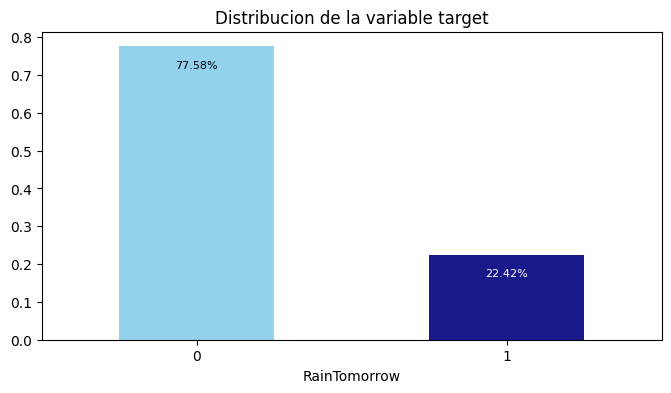

RainToday
0    0.778695
1    0.221305
Name: proportion, dtype: float64


In [6]:
fig = plt.figure(figsize=(8, 4))
ax = weather_df.RainTomorrow.value_counts(normalize=True).plot(kind='bar',color= ['skyblue','navy'], alpha=0.9, rot=0)

for idx, p in enumerate(ax.patches):
    color = 'black' if idx == 0 else 'white'
    ax.annotate(f'{p.get_height():.2%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='top',
                xytext=(0, -10), # ajusto la etiqueta
                textcoords='offset points',
                fontsize=8,
                color=color)
plt.title('Distribucion de la variable target')
plt.show()

print(weather_df["RainToday"].value_counts(normalize=True))

Del analisis anterior, podemos visualizar que el target no esta balanceado, lo cual puede traer problemas a la hora de entrenar el modelo.

In [9]:
# Voy a revisar ahora que no tengo datos nulos
missing_values=weather_df.isnull().sum() # missing values

percent_missing = weather_df.isnull().sum()/weather_df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing , 
     'data type' : weather_df.dtypes
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %,data type
MinTemp,0,0.0,float64
MaxTemp,0,0.0,float64
Rainfall,0,0.0,float64
Evaporation,0,0.0,float64
Sunshine,0,0.0,float64
WindGustSpeed,0,0.0,float64
WindSpeed9am,0,0.0,float64
WindSpeed3pm,0,0.0,float64
Humidity9am,0,0.0,float64
Humidity3pm,0,0.0,float64


# Definición del baseline y selección del modelo a utilizar


## Baseline

In [7]:
# Se separa el target del resto de las features
X = weather_df.drop(columns='RainTomorrow')
y = weather_df['RainTomorrow']

In [42]:
# Se separa el conjunto de entrenamiento y testeo en 75% y 25% respectivamente.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1234)

In [43]:
# Opción 1 de baseline: Predice siempre que no va a llover
rain_tomorrow_freq = y_test.value_counts(normalize=True)
y_pred_baseline1_test = rain_tomorrow_freq.idxmax()
y_pred_baseline1_test = np.array([y_pred_baseline1_test] * len(y_test))

In [44]:
# Opción 2 de baseline: Predice que si va a llover o no asumiendo que pasará lo mismo que hoy. 
y_pred_baseline2_test = X_test['RainToday']

In [45]:
# Se escalan los datos
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

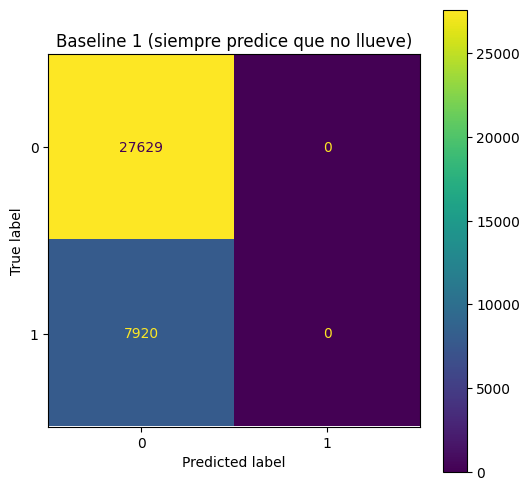

In [46]:
cm_baseline1 = confusion_matrix(y_test, y_pred_baseline1_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_baseline1)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Baseline 1 (siempre predice que no llueve)");

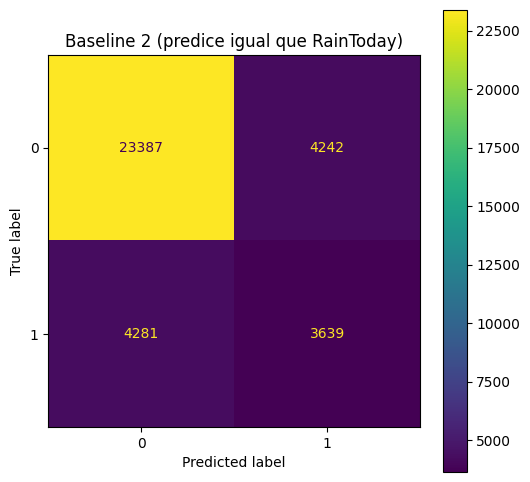

In [47]:
cm_baseline2 = confusion_matrix(y_test, y_pred_baseline2_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_baseline2)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Baseline 2 (predice igual que RainToday)");

In [48]:
def model_stats(modelname, confusion_matrix, y_test, y_pred):
    print(f"Estadisticas para el modelo: {modelname}")
    P = np.sum(confusion_matrix[1, :])
    N = np.sum(confusion_matrix[0, :])
    TP = confusion_matrix[1, 1]
    TN = confusion_matrix[0, 0]
    TPR = TP/P
    TNR = TN/N
    print(f"Sensibilidad: {TP/P}")
    print(f"Especificidad: {TN/N}")
    print(f"Exactitud balanceada: {(TPR + TNR)/2}")
    print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
    print(f"Recuperación: {recall_score(y_test, y_pred, zero_division=0)}")
    print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"======================")

In [49]:
# Se evalúan métricas para ambos modelos
model_stats("Baseline 1", cm_baseline1, y_test, y_pred_baseline1_test)
model_stats("Baseline 2", cm_baseline2, y_test, y_pred_baseline2_test)

Estadisticas para el modelo: Baseline 1
Sensibilidad: 0.0
Especificidad: 1.0
Exactitud balanceada: 0.5
Precision: 0.0
Recuperación: 0.0
F1-score: 0.0
Accuracy: 0.7772089228951587
Estadisticas para el modelo: Baseline 2
Sensibilidad: 0.459469696969697
Especificidad: 0.846465670129212
Exactitud balanceada: 0.6529676835494544
Precision: 0.4617434335744195
Recuperación: 0.459469696969697
F1-score: 0.4606037592557433
Accuracy: 0.7602464204337674


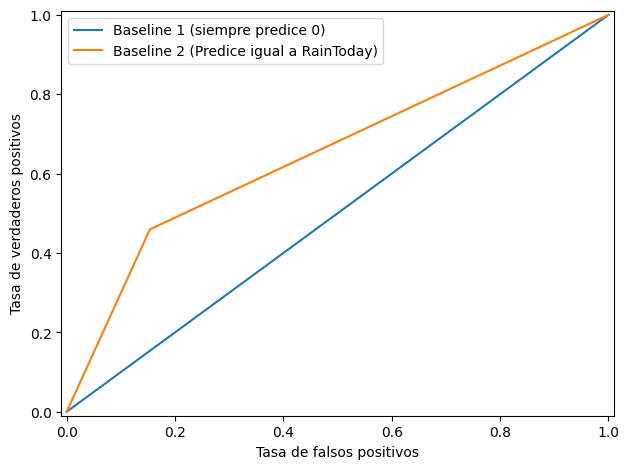

In [50]:
fpr_baseline1, tpr_baseline1, _ = roc_curve(y_test, y_pred_baseline1_test)
fpr_baseline2, tpr_baseline2, _ = roc_curve(y_test, y_pred_baseline2_test)

plt.plot(fpr_baseline1, tpr_baseline1, label="Baseline 1 (siempre predice 0)")
plt.plot(fpr_baseline2, tpr_baseline2, label="Baseline 2 (Predice igual a RainToday)")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.legend()
plt.tight_layout()

In [51]:
print(f"AUC (baseline 1): {auc(fpr_baseline1, tpr_baseline1)}")
print(f"AUC (baseline 2): {auc(fpr_baseline2, tpr_baseline2)}")

AUC (baseline 1): 0.5
AUC (baseline 2): 0.6529676835494544


**Nota:** De los estudios anteriores, podemos ver que entre ambos **baselines** vamos a optar por utilizar el segundo (baseline 2) dado que tiene un AUC mayor y ademas nos permite analizar mejor las metricas para el modelo. No como el primer caso donde todas las metricas son valores redondos dificiles de comparar.

## Feature selection 

Ahora vamos a analizar un poco mas el dataset en busqueda de features que podamos eliminar para cumplir el principio de:

` garbage in -> garbage out`

Si bien en el notebook de analisis de datos ya se realizo un analisis de las features, vamos a utilizar nuevas herramientas para poder tener una vision mas clara de las features que vamos a utilizar.

In [18]:
features_list = list(weather_df.columns.values)
features_list.remove("RainTomorrow")

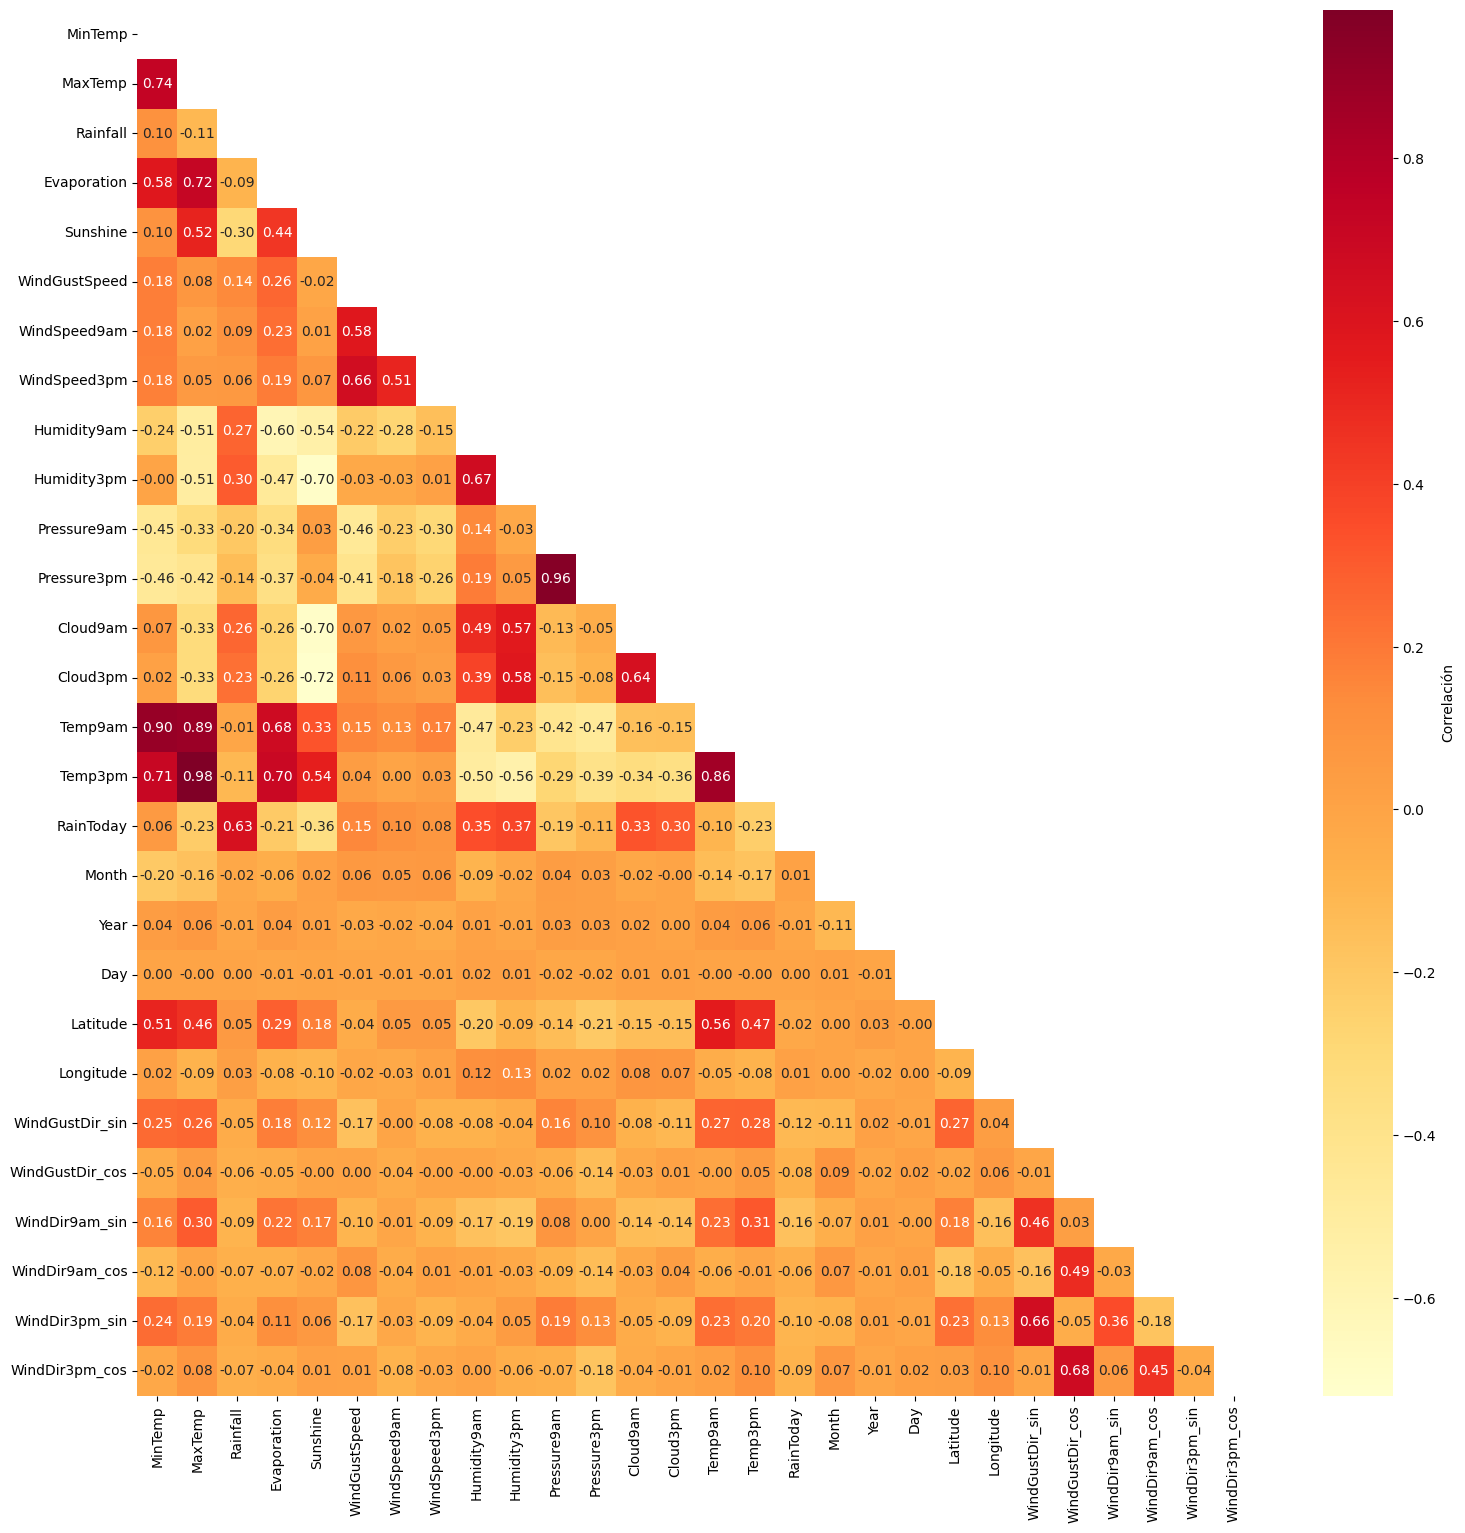

In [19]:
# correlación seaborn entre variables numéricas
plt.figure(figsize=(18,18))

corr_weather = weather_df[features_list].corr()
mask = np.triu(np.ones_like(corr_weather, dtype=bool))
sns.heatmap(corr_weather, mask=mask,annot=True, cmap='YlOrRd', fmt=".2f", cbar_kws={'label': 'Correlación'})
plt.show()

De la matriz de correlacion, podemos ver que tenemos una correlacion muy fuerte (>80) entre:

- Temp9am y MinTemp
- Temp3pm y MaxTemp
- Pressure9am y Pressure3pm
- Temp3pm y Temp9am

Y luego tenemos otro sub conjunto de correlacion menos fuertes pero que estan entre el 0.6 y el 80%:
- WindDier3pm_cos & WindGustDir_cos
- WindDier3pm_sin & WindGustDir_sin
- Cloud9am & Cloud9pm
- Humidity9am & Humidity3am
- Evaporation & MaxTemp
- WindSpeed3pM & WindGustSpeed

Para no entrenar con información irrelevante (por la alta colinealidad entre variables) vamos a eliminar las features que se encuentran en el primer subgrupo (>80%) dado que las mismas no le aportan informacion relevante al modelo.

In [20]:
# Eliminacion de features con alta correlación
to_delete = ["Temp9am", "Temp3pm", "Pressure9am"]
weather_df.drop(to_delete, axis=1, inplace=True)

In [21]:
(weather_df.columns.values)

array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday',
       'RainTomorrow', 'Month', 'Year', 'Day', 'Latitude', 'Longitude',
       'WindGustDir_sin', 'WindGustDir_cos', 'WindDir9am_sin',
       'WindDir9am_cos', 'WindDir3pm_sin', 'WindDir3pm_cos'], dtype=object)

Seleccionar características mediante el método de filtrado (valor de chi-cuadrado): antes de hacer esto, primero debemos normalizar nuestros datos. 


Usamos MinMaxScaler en lugar de StandardScaler dado que el ultimo esta recomendado para escenarios donde nuestra distribucion de datos se asemeja a una normal. En nuestro caso eso solo sucede en ciertas variables como la de la temperatura y la presion, luego para otras variables no se asemejan a una normal. Por eso utilizamos el MinMaxScaler


In [37]:
# Standardizing data
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(weather_df)
modified_data = pd.DataFrame(r_scaler.transform(weather_df), index=weather_df.index, columns=weather_df.columns)

In [38]:
# Feature Importance using Filter Method (Chi-Square)
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am',
       'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')


In [79]:
# Selecciono las features con un random forest 
X = weather_df.drop('RainTomorrow', axis=1)
y = weather_df['RainTomorrow']

# Entrenar el modelo Random Forest una sola vez
model = rf(n_estimators=100, random_state=0)
model.fit(X, y)

selector = SelectFromModel(model, prefit=True)
support = selector.get_support()
features = X.loc[:, support].columns.tolist()

importances = model.feature_importances_.tolist()
feature_importances = list(zip(features, importances))
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

print("\nTop 9 features:")
for feature, importance in sorted_feature_importances[:9]:
    print(f"{feature}: {importance}")


Top 9 features:
WindGustSpeed: 0.10929396820889775
Humidity9am: 0.0503070032926133
Rainfall: 0.0450247331186074
Cloud3pm: 0.04250925764328619
MinTemp: 0.041870431406250984
MaxTemp: 0.041602744844851006
Sunshine: 0.03688944068665991
Pressure3pm: 0.028452249426083157
Humidity3pm: 0.026349241820144052


## Selección del modelo

Dividiremos el conjunto de datos en conjuntos de entrenamiento (75%) y de prueba (25%) respectivamente para entrenar el modelo de predicción de lluvia. Para obtener mejores resultados, estandarizaremos nuestros datos X_train y X_test:

En este caso vamos a hacer uso de todas la features del dataset

In [52]:
features_list = list(weather_df.columns.values)

In [53]:
features_list.remove("RainTomorrow")
features_list

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'RainToday',
 'Month',
 'Year',
 'Day',
 'Latitude',
 'Longitude',
 'WindGustDir_sin',
 'WindGustDir_cos',
 'WindDir9am_sin',
 'WindDir9am_cos',
 'WindDir3pm_sin',
 'WindDir3pm_cos']

In [54]:
features = weather_df[features_list]
target = weather_df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [55]:
# Standardizing data
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(X_train)
X_train = pd.DataFrame(r_scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(r_scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [80]:
# Función para ejecutar y evaluar el modelo
def run_model(model, X_train, y_train, X_test, y_test, modelname):
    start_time = time.time()
    model.fit(X_train, y_train)

    time_taken_train = time.time() - start_time
    start_time = time.time()

    y_pred = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]

    time_taken_predict = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, probs)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    

    # Plot ROC curve
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    # Plot Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()

    matrix = confusion_matrix(y_test, y_pred)

    model_stats(modelname, matrix, y_test, y_pred)

    return model, accuracy, roc_auc, coh_kap, time_taken_train, time_taken_predict

# Función para graficar la curva ROC
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### Regresión logística

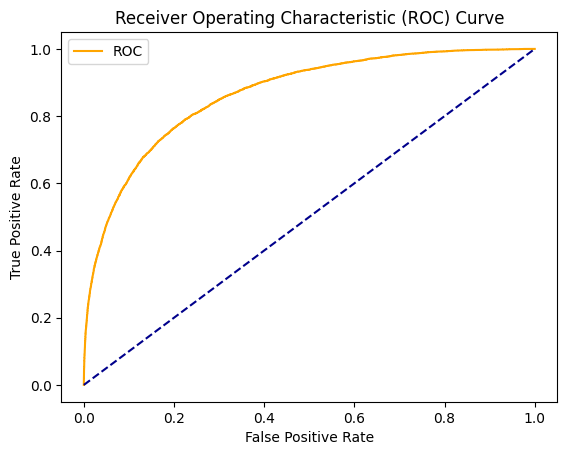

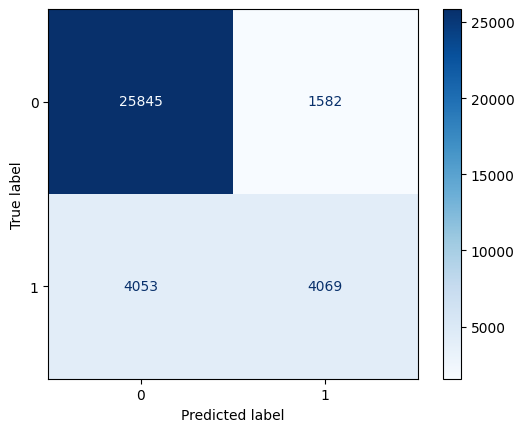

Estadisticas para el modelo: Regresion Logistica
Sensibilidad: 0.5009849790691948
Especificidad: 0.9423196120611077
Exactitud balanceada: 0.7216522955651512
Precision: 0.7200495487524332
Recuperación: 0.5009849790691948
F1-score: 0.5908661874682349
Accuracy: 0.8414863990548257


In [86]:
params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, ttt_lr , ttp_lr = run_model(model_lr, X_train, y_train, X_test, y_test, "Regresion Logistica")

**NOTA:** Vemos que el F1-score en este modelo simple funciona mejor que las baselines que propusimos.

### Árbol de desición

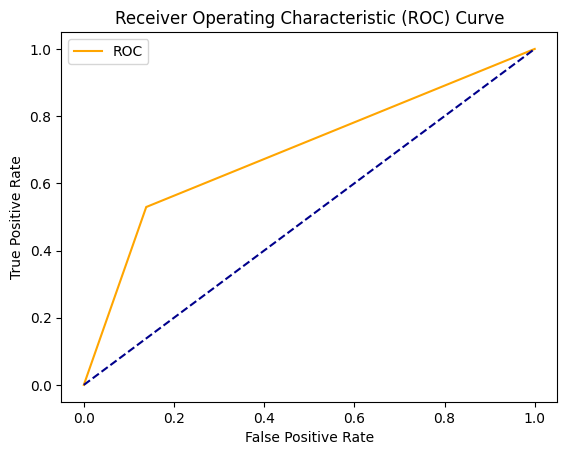

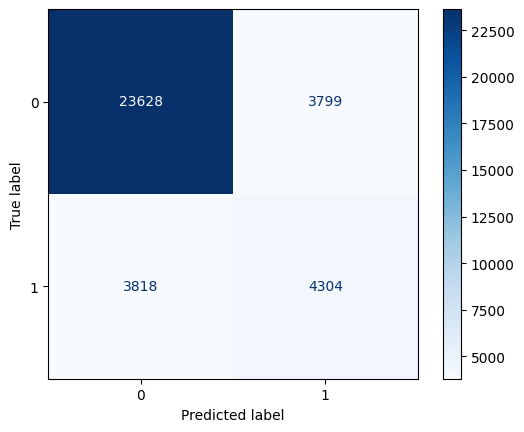

Estadisticas para el modelo: Arbol de desición
Sensibilidad: 0.5299187392267914
Especificidad: 0.8614868560177927
Exactitud balanceada: 0.695702797622292
Precision: 0.5311612982845859
Recuperación: 0.5299187392267914
F1-score: 0.5305392912172573
Accuracy: 0.7857323694056092


In [82]:
params_dt = {'max_depth': 30,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, ttt_dt , ttp_dt = run_model(model_dt, X_train, y_train, X_test, y_test, "Arbol de desición")

### Random Forest

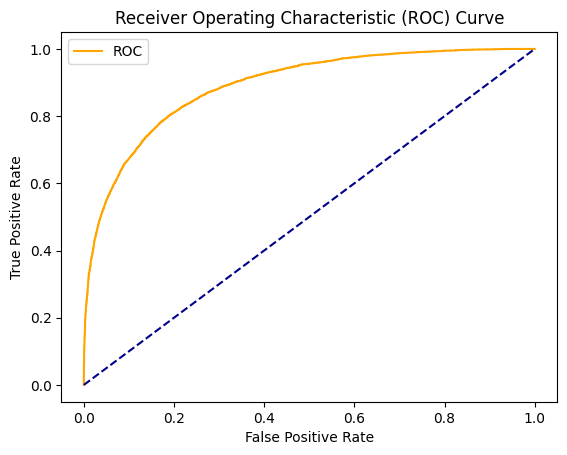

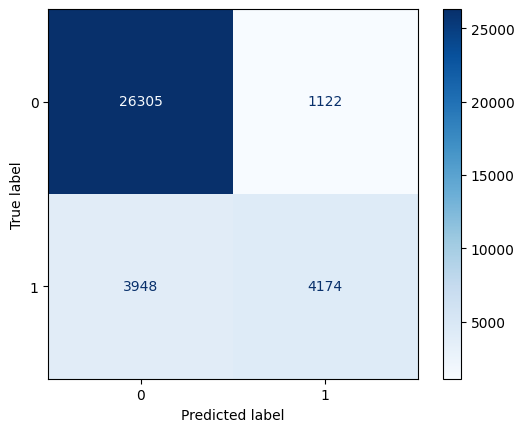

Estadisticas para el modelo: Random Forest
Sensibilidad: 0.5139128293523763
Especificidad: 0.9590914062784847
Exactitud balanceada: 0.7365021178154305
Precision: 0.7881419939577039
Recuperación: 0.5139128293523763
F1-score: 0.6221493516172306
Accuracy: 0.8573799544290979


In [91]:
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 500,
             'random_state': 12345}

model_rf = rf(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, ttt_rf , ttp_rf = run_model(model_rf, X_train, y_train, X_test, y_test, "Random Forest")

### LGBMClassifier
Árbol de desición de LGBM

[LightGBM] [Info] Number of positive: 23755, number of negative: 82889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2085
[LightGBM] [Info] Number of data points in the train set: 106644, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222750 -> initscore=-1.249709
[LightGBM] [Info] Start training from score -1.249709


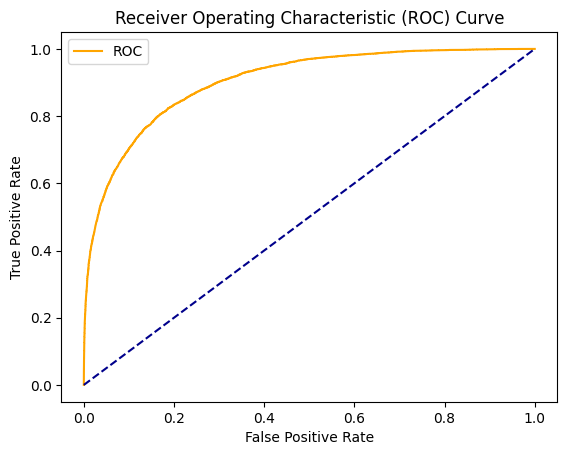

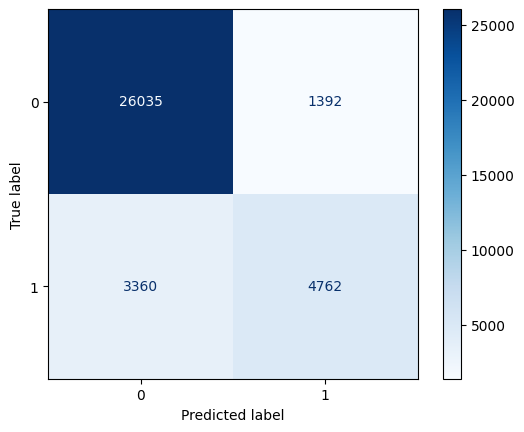

Estadisticas para el modelo: LightGBM
Sensibilidad: 0.5863087909381925
Especificidad: 0.9492470922813286
Exactitud balanceada: 0.7677779416097605
Precision: 0.7738056548586285
Recuperación: 0.5863087909381925
F1-score: 0.6671336508826001
Accuracy: 0.8663253537370953


In [88]:
# Light GBM
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 500, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, ttt_lgb , ttp_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test, "LightGBM")

### XGBClassifier

Árbol de desición de XGBoost

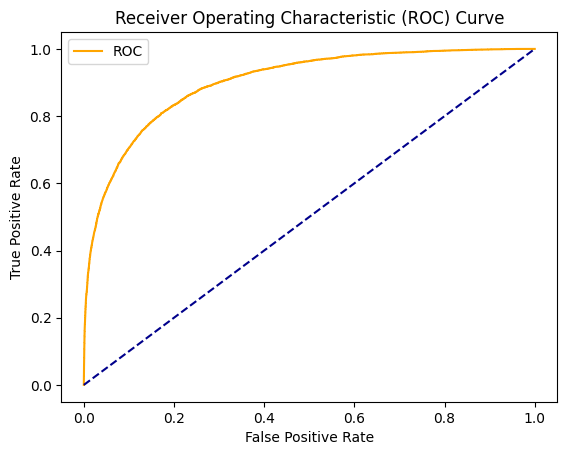

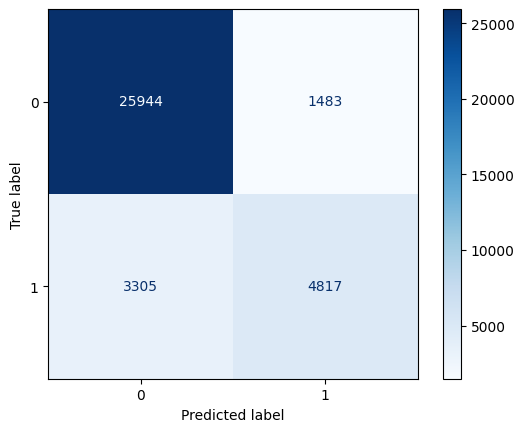

Estadisticas para el modelo: XGB
Sensibilidad: 0.5930805220389067
Especificidad: 0.9459291938600649
Exactitud balanceada: 0.7695048579494859
Precision: 0.7646031746031746
Recuperación: 0.5930805220389067
F1-score: 0.6680072112051033
Accuracy: 0.8653126670229824


In [94]:
# XGBoost
params_xgb = {'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 500, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, ttt_xgb , ttp_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test, "XGB")

### KNN

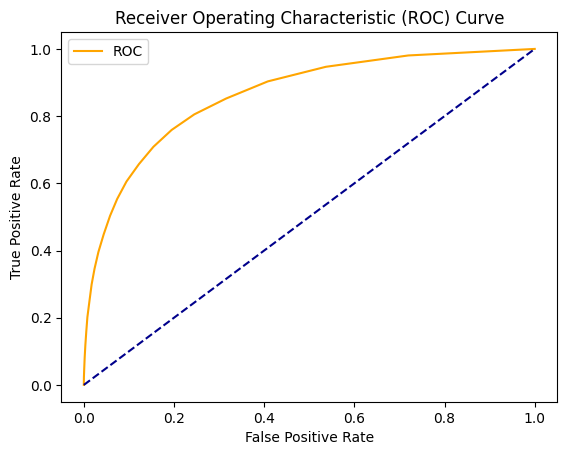

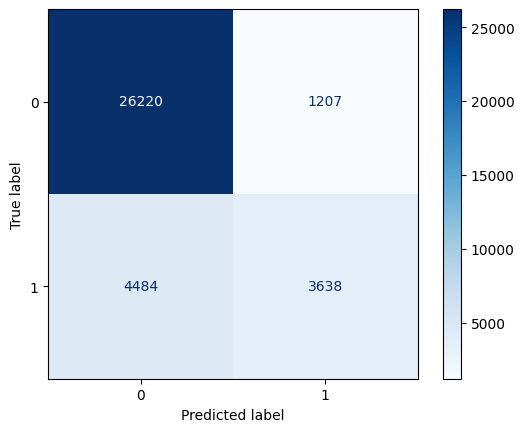

Estadisticas para el modelo: k-NN
Sensibilidad: 0.447919231716326
Especificidad: 0.9559922703904912
Exactitud balanceada: 0.7019557510534086
Precision: 0.7508771929824561
Recuperación: 0.447919231716326
F1-score: 0.5611166808051207
Accuracy: 0.8399111086106501


In [98]:
params_knn = {
    'n_neighbors': 23,
    'metric': 'minkowski',
    'p': 2
}

model_knn = KNeighborsClassifier(**params_knn)
model_knn, accuracy_knn, roc_auc_knn, coh_kap_knn, ttt_knn, ttp_knn = run_model(model_knn, X_train, y_train, X_test, y_test, "k-NN")

## Comparación de modelos

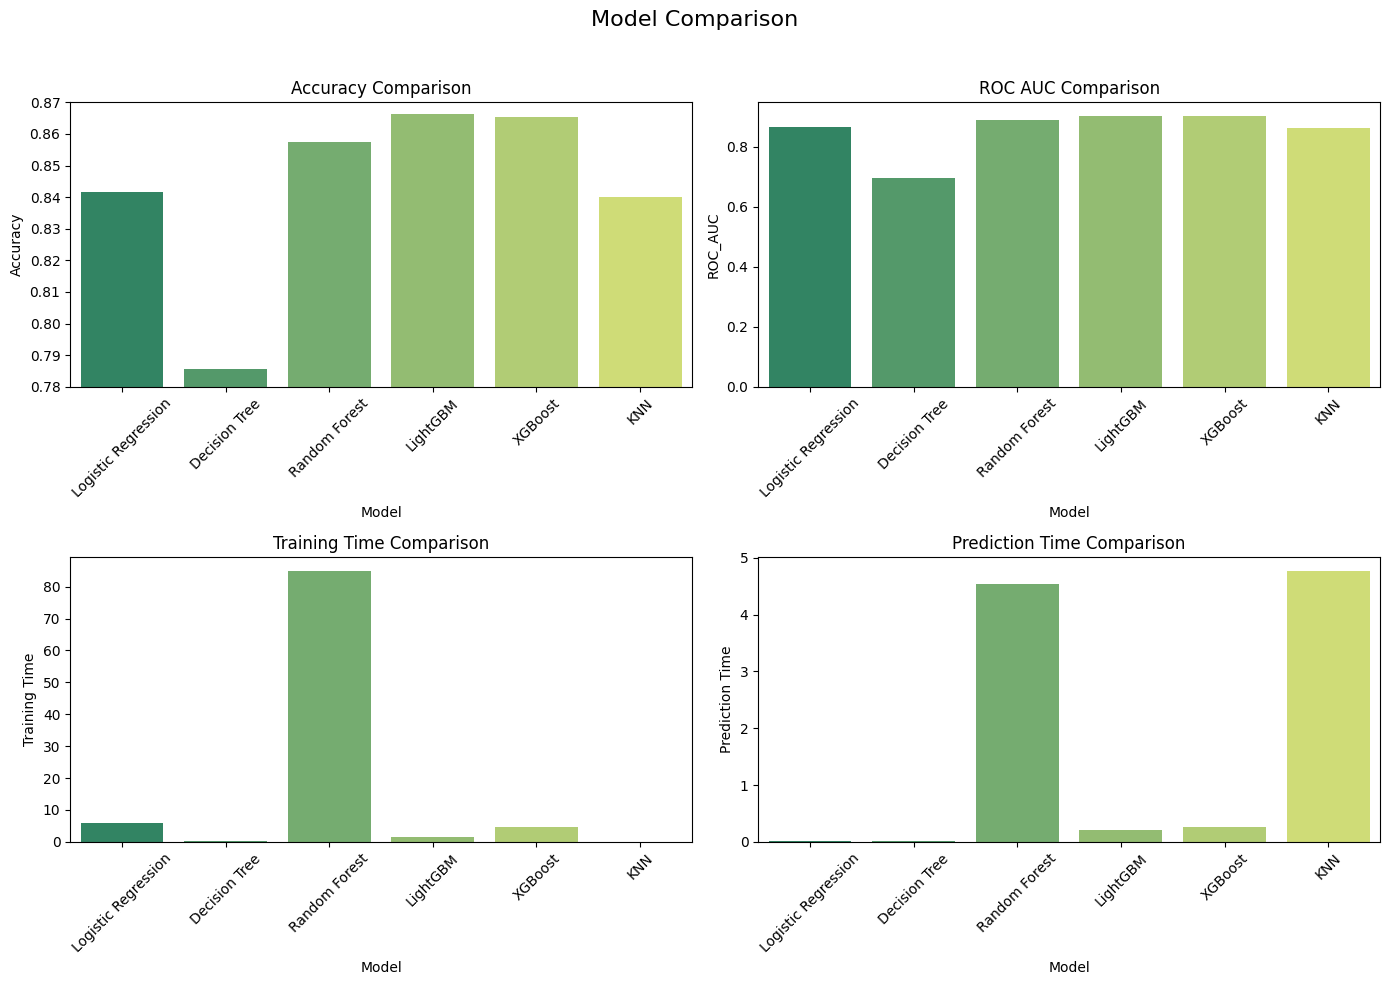

In [100]:
# Define the scores and time taken for each model
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_lgb, accuracy_xgb, accuracy_knn]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_lgb, roc_auc_xgb, roc_auc_knn]
ttt = [ttt_lr, ttt_dt, ttt_rf, ttt_lgb, ttt_xgb, ttt_knn]
ttp = [ttp_lr, ttp_dt, ttp_rf, ttp_lgb, ttp_xgb, ttp_knn]

# Define the model names
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LightGBM', 'XGBoost', 'KNN']

# Create a dataframe for plotting
model_data = {
    'Model': models,
    'Accuracy': accuracy_scores,
    'ROC_AUC': roc_auc_scores,
    'Training Time': ttt,
    'Prediction Time': ttp
}
data = pd.DataFrame(model_data)

# Set up the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Comparison', fontsize=16)

# Define the color palette
palette = 'summer'

# Plot Accuracy
sns.barplot(x='Model', y='Accuracy', data=data, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylim(0.78, 0.87)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot ROC_AUC
sns.barplot(x='Model', y='ROC_AUC', data=data, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('ROC AUC Comparison')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot Training Time
sns.barplot(x='Model', y='Training Time', data=data, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('Training Time Comparison')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot Prediction Time
sns.barplot(x='Model', y='Prediction Time', data=data, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Prediction Time Comparison')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**NOTA:** A partir de los datos anteriores podemos ver como el XGBoost es uno de los modelos que mejor performa. A partir de este vamos a trabajar mejorarndo nuestro modelo ... 

# Entrenamiento del modelo

## Construccion de modelos alternativos

A partir de que el modelo XGBoost fue el mejor, voy a empezar a entrenar dicho modelo pero modificando el dataset y quedandome con las features mas importante que fueron encontradas en el paso anterior

### Creacion de hiperparametros

In [106]:
# escala de targets negativos para scale_pos_weight
negativos = sum(y==0)
positivos = sum(y==1)
scale = negativos / positivos
scale

3.4606769771308468

In [107]:
# peso de los true targets para base_score
peso = y.mean()
peso

0.22418121848473554

In [108]:
### Parametria a explorar (hiperparametros).
dictParams = {'max_depth':[3, 5, 1],
    'learning_rate':[0.07, 0.1, 0.15, 0.2],
    #'n_estimators':[200,400,600],
    #'silent':[True],
    'objective':['binary:logistic'],
    'booster': ['gbtree'],
    'gamma':[0, 1, 2],
    'min_child_weight':[0],
    'max_delta_step':[0],
    'subsample':[0.7, 0.3],
    'colsample_bytree':[0.7,0.5],
    'colsample_bylevel':[0.7,0.5],
    'reg_alpha':[0,0.1,0.5, 0.05],
    'reg_lambda':[1,0.8,0.3, 1.2],
    'scale_pos_weight':[scale, 1, 2, 5],
    #'num_leaves':[5,20,60,150]
    'base_score': [peso, 0.1, 0.5]
    }

In [109]:
semilla = 180185     
model = xgb.XGBClassifier()

### Entrenamiento con CV

In [113]:
search = HalvingRandomSearchCV(model,
                                dictParams,
                                resource='n_estimators',
                                max_resources=400,
                                min_resources=100 // 4,
                                factor=2,
                                cv = 5,
                                random_state=0,
                                verbose=1)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 25
max_resources_: 400
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 16
n_resources: 25
Fitting 5 folds for each of 16 candidates, totalling 80 fits
----------
iter: 1
n_candidates: 8
n_resources: 50
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 2
n_candidates: 4
n_resources: 100
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 3
n_candidates: 2
n_resources: 200
Fitting 5 folds for each of 2 candidates, totalling 10 fits
----------
iter: 4
n_candidates: 1
n_resources: 400
Fitting 5 folds for each of 1 candidates, totalling 5 fits


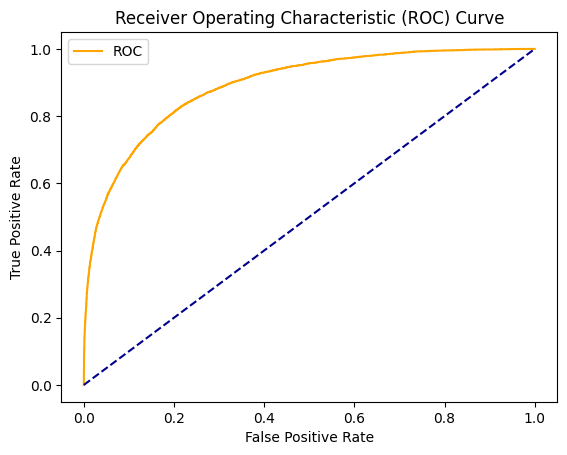

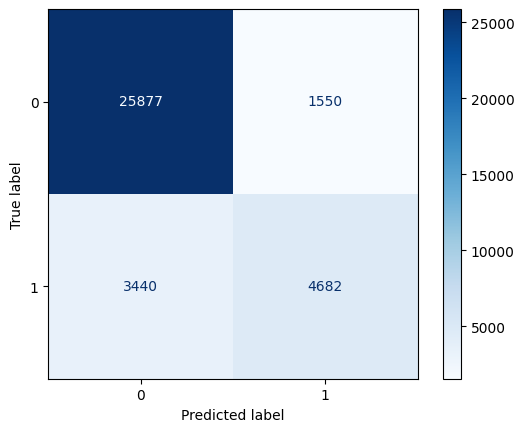

Estadisticas para el modelo: XGB - Search
Sensibilidad: 0.5764590002462447
Especificidad: 0.9434863455718817
Exactitud balanceada: 0.7599726729090632
Precision: 0.7512836970474968
Recuperación: 0.5764590002462447
F1-score: 0.6523617110213181
Accuracy: 0.8596303693493488


In [117]:
model_search, accuracy_search, roc_auc_search, coh_kap_search, ttt_search, ttp_search = run_model(search, X_train, y_train, X_test, y_test, "XGB - Search")

### Evaluacion

#### Metricas visuales

Trabajando con 2500 muestras

In [118]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, average_precision_score  # visuales
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.calibration import calibration_curve

In [119]:
y_pred_prob = search.predict_proba(X_test)[:,1]
y_pred = search.predict(X_test)

In [120]:
# vamos a graficar un subset random 
if len(y_test) <= 2500:
    y_graph = y_test
else:
    y_graph = y_test.sample(2500)

# Convertir y_pred_prob a una pd.Series si es un array de numpy
if isinstance(y_pred_prob, np.ndarray):
    y_pred_prob = pd.Series(y_pred_prob, index=y_test.index)
    
y_test_g = y_test.loc[y_graph.index]
y_pred_prob_g = y_pred_prob.loc[y_graph.index]

In [121]:
#seleccion del thr usando la g-mean
fpr, tpr, thresholds = roc_curve(y_test_g, y_pred_prob_g)
prs, res, thresholds_prerec  = precision_recall_curve(y_test_g, y_pred_prob_g)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
thr = thresholds[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.222317, G-Mean=0.812


In [122]:
# aditional metrics
aucroc = auc(fpr, tpr) 
aucpr = auc(res, prs) 
ap = average_precision_score(y_test, y_pred_prob)
y_proportion = sum(y_test)/len(y_test)

##### Curvas ROC y Presicion-Recall

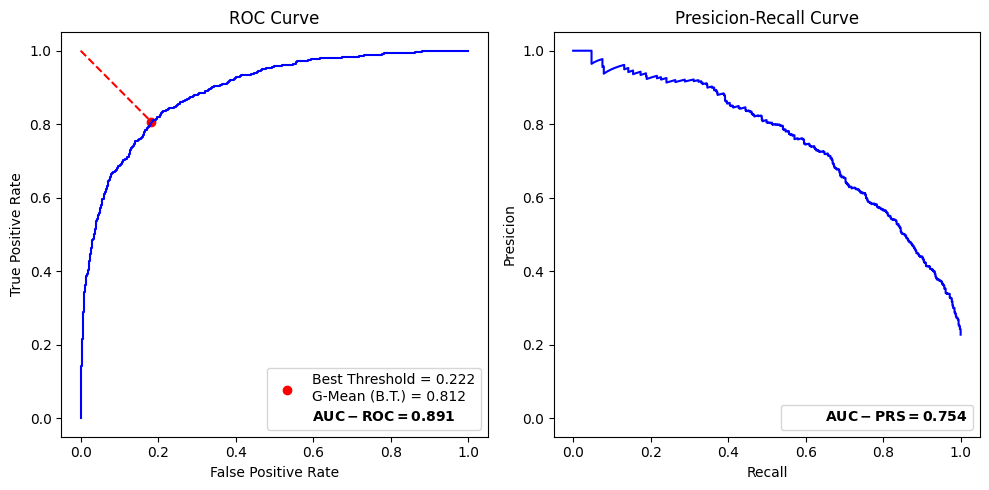

In [123]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Primer subplot
ax1.plot(fpr, tpr, color='blue')
ax1.scatter(fpr[np.argmax(gmeans)], tpr[np.argmax(gmeans)], marker='o', color='red',
            label='Best Threshold = %.3f\nG-Mean (B.T.) = %.3f' % (thresholds[np.argmax(gmeans)], gmeans[np.argmax(gmeans)]))
ax1.plot([0, fpr[np.argmax(gmeans)]], [1, tpr[np.argmax(gmeans)]], 'r--')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_xlim([-0.05, 1.05])
ax1.set_ylim([-0.05, 1.05])
ax1.set_title('ROC Curve')
ax1.legend(loc='lower right')

# Añadir la métrica AUC - ROC a la leyenda
handles, labels = ax1.get_legend_handles_labels()
handles.append(plt.Line2D([], [], linestyle='-', color='none', label=r'$\bf{AUC - ROC = %.3f}$' % aucroc))
ax1.legend(handles=handles, loc='lower right')

# Segundo subplot
ax2.plot(res, prs, color='blue')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Presicion')
ax2.set_xlim([-0.05, 1.05])
ax2.set_ylim([-0.05, 1.05])
ax2.set_title('Presicion-Recall Curve')

# Añadir la métrica AUC - PRS a la leyenda
handles2, labels2 = ax2.get_legend_handles_labels()
handles2.append(plt.Line2D([], [], linestyle='-', color='none', label=r'$\bf{AUC - PRS = %.3f}$' % aucpr))
ax2.legend(handles=handles2, loc='lower right')

plt.tight_layout()
plt.show()

#print("AUC - ROC:", aucroc)
#print("AUC - PRS:", aucpr)


##### Matriz de confusión

Como ahora seleccionamos un threshold a patir de la curva ROC, al graficar nuevamente la matriz de confusión vamos a obtener valores distintos a la matriz anterior.

In [124]:
# Confusion Matrix
cm = confusion_matrix(y_test, (y_pred_prob > thr)*1)
cmat = cm / cm.sum(axis=1)[:, np.newaxis]

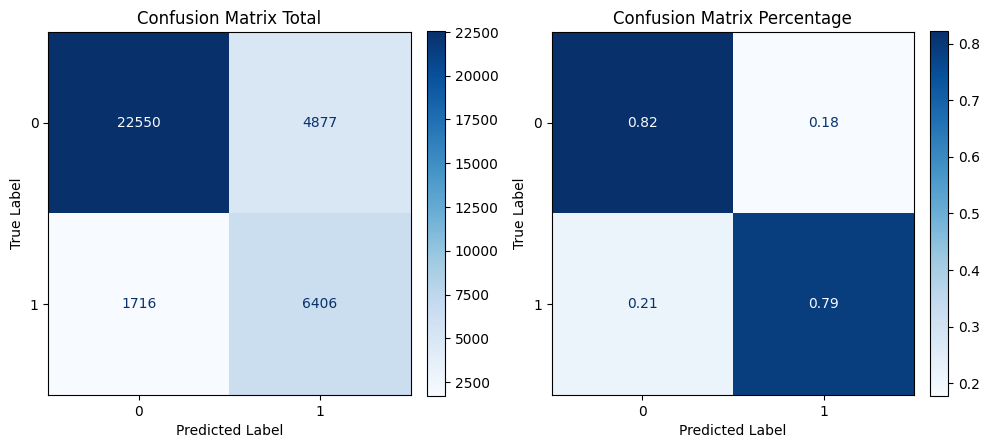

In [125]:
# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot para ax1 usando cm
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp1.plot(cmap=plt.cm.Blues, ax=ax1, colorbar=False)  # Desactiva la barra de color predeterminada
ax1.set_title('Confusion Matrix Total')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# Añadir barra de colores ajustada en altura en ax1
cax1 = disp1.ax_.figure.colorbar(disp1.im_, ax=ax1, fraction=0.046, pad=0.04)
#cax1.set_label('Counts', rotation=-90, va="bottom")

# Plot para ax2 usando cmat
disp2 = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=[0, 1])
disp2.plot(cmap=plt.cm.Blues, ax=ax2, colorbar=False)  # Desactiva la barra de color predeterminada
ax2.set_title('Confusion Matrix Percentage')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')

# Añadir barra de colores ajustada en altura en ax2
cax2 = disp2.ax_.figure.colorbar(disp2.im_, ax=ax2, fraction=0.046, pad=0.04)
#cax2.set_label('Counts', rotation=-90, va="bottom")

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

##### Curva de calibración y densidades de las clases

In [128]:
N = np.sum(y_test)
#idxs = np.random.choice(np.where(y_test==0)[0], size=N)
#idxs = np.concatenate((idxs.flatten(), np.where(y_test==1)[0].flatten()))

idxs_0 = np.random.choice(y_test[y_test==0].index, size=N)
idxs_1 = y_test[y_test==1].index
idxs = np.concatenate([idxs_0, idxs_1])

y_test_sampled, y_pred_prob_sampled = y_test[idxs], y_pred_prob[idxs]

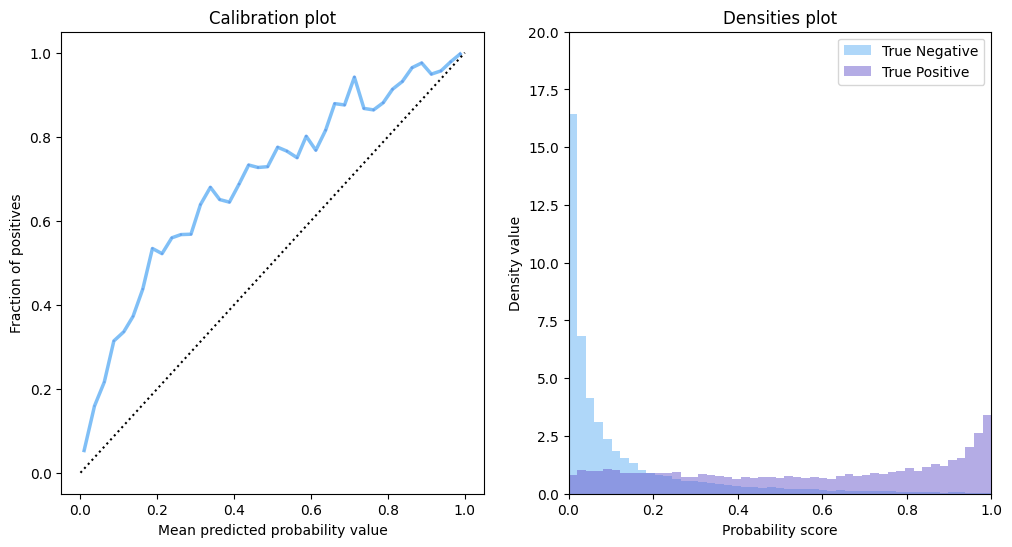

In [129]:
frac_of_pos, mean_pred_val = calibration_curve(y_test_sampled, y_pred_prob_sampled, n_bins=40)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(mean_pred_val, frac_of_pos, color='slateblue', alpha=0.8, s=frac_of_pos)
ax1.plot(mean_pred_val, frac_of_pos, "-", color="#61b0f4", alpha=0.8, linewidth=2.5)
ax1.plot([0, 1], [0, 1], "k:")
#eje x: valores medios de las probabilidades predichas en cada bin
ax1.set_xlabel("Mean predicted probability value")
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.set_title('Calibration plot')

#Densities

true_pos = y_pred_prob[y_test==1]
true_neg = y_pred_prob[y_test==0]
bins = np.linspace(0, 1, 50)
ax2.hist(true_neg, bins, color="#61b0f4", alpha=0.5,density=0.5, label='True Negative')
ax2.hist(true_pos, bins, color='slateblue', alpha=0.5,density=0.5, label='True Positive')
ax2.legend(loc='upper right')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 20])
ax2.set_xlabel('Probability score')
ax2.set_ylabel('Density value')
ax2.set_title('Densities plot')

plt.show()

**Interpretación:**

- Curva de calibración:

    - El eje x representa los valores medios de las probabilidades predichas en cada bin (se configuraron 40 bines).

    - En la línea diagonal: Esta representa una calibración perfecta. Por ejemplo, si el modelo predice una probabilidad de 0.7, debería corresponder a que el resultado sea positivo en el 70% de los casos.

    - Por encima de la línea diagonal: El modelo es subestimado. Predice probabilidades más bajas que los resultados reales. Por ejemplo, una probabilidad predicha de 0.4 podría corresponder a una tasa real de resultados positivos del 50%.

    - Por debajo de la línea diagonal: El modelo es sobreestimado. Predice probabilidades más altas que los resultados reales. Por ejemplo, una probabilidad predicha de 0.7 podría corresponder a una tasa real de resultados positivos del 60%.

    - **En este caso el modelo está subestimando.**

- Gráfico de densidades:

    - En este caso hay una buena separación de las funciones de densidad de probabilidades. Vemos que los True Negative se acumulan hacia un score de probabilidad 0 mientras que los True Positive se acumulan sobre el 1. Por ende la moda de las densidades de las probabilidades predichas para cada clase devuelven valores coherentes. 

    - Por otro lado vemos que la densidad en la clase True Positive no decae de manera ideal para los score de probabilidades más bajas. Es decir, **el modelo está performando mejor para predecir los True Negative.**

##### Tabla y gráfico KS

Se va a trabajar con el mismo sample de datos que el gráfico anterior y se van a utilizar 10 bines para agrupar las probabilidades predichas.

In [130]:
def ks_chart(score,target):
    """ Función para obtener la tabla de KS.
    Parámetros
    ---------- 
    score: nombre de la variable que tenga el score o probabilidad
    target: nombre de la varuable que tenga el objetivo
    ------
    Return: Tabla KS
    ------
    """ 
    data = pd.DataFrame()
    data[y_test.name] = y_test_sampled
    data['score'] = y_pred_prob_sampled
    
    data['good'] = 1 - data[target.name]
    data['bucket'] = pd.qcut(data['score'], 10, duplicates='drop')
    grouped = data.groupby('bucket', as_index = False)
    agg1 = pd.DataFrame(np.round(list(grouped.min()['score']),4), columns = ['min'])
    agg1['min'] = agg1['min'].apply('{0:.3f}'.format)
    agg1['max'] = grouped.max()['score'].apply('{0:.3f}'.format)
    agg1['bads'] = grouped.sum()[target.name]
    agg1['goods'] = grouped.sum()['good']
    agg1['total'] = agg1['bads'] + agg1['goods']
    agg2 = (agg1.sort_values(by = 'min')).reset_index(drop = True)
    agg2['odds'] = (agg2['goods'] / agg2['bads']).apply('{0:.1f}'.format)
    agg2['bad_rate'] = (agg2['bads'] / agg2.total).apply('{0:.1%}'.format)
    agg2['ks'] = abs(np.round(((agg2['bads'] / data[target.name].sum()).cumsum() - (agg2['goods'] / data['good'].sum()).cumsum()), 4) * 100).apply('{0:.1f}'.format)

    # Calcular la probabilidad acumulada para los casos positivos y negativos
    agg2['cum_positive'] = agg2['goods'].cumsum() / agg2['goods'].sum()
    agg2['cum_negative'] = agg2['bads'].cumsum() / agg2['bads'].sum()

    return agg2

ks_table = ks_chart(score = y_pred_prob_sampled,target = y_test_sampled)

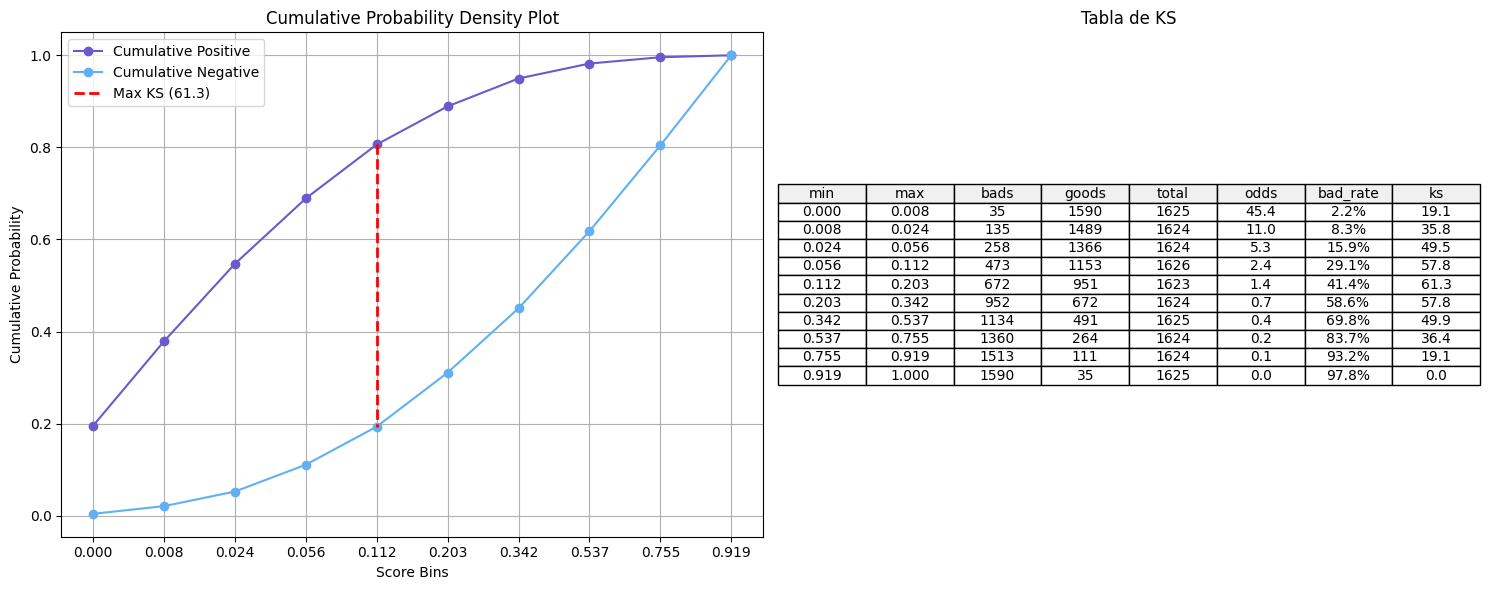

In [131]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

## FIGURA 1 - PROBABILIDAD ACUMULADA
ax1.plot(ks_table['min'], ks_table['cum_positive'], marker='o', linestyle='-', color='slateblue', label='Cumulative Positive')
ax1.plot(ks_table['min'], ks_table['cum_negative'], marker='o', linestyle='-', color='#61b0f4', label='Cumulative Negative')

# Encontrar el punto de máximo KS
max_ks_idx = ks_table['ks'].astype(float).idxmax()
# Obtener las coordenadas del punto máximo KS
max_ks_value = ks_table.loc[max_ks_idx, 'min']
max_cum_positive = ks_table.loc[max_ks_idx, 'cum_positive']
max_cum_negative = ks_table.loc[max_ks_idx, 'cum_negative']
# Línea vertical para el punto de máximo KS
ax1.plot([max_ks_value, max_ks_value], [max_cum_positive, max_cum_negative], linestyle='--', color='red', linewidth=2, label=f'Max KS ({ks_table.loc[max_ks_idx, "ks"]})')

ax1.set_xlabel('Score Bins')
ax1.set_ylabel('Cumulative Probability')
ax1.set_title('Cumulative Probability Density Plot')
ax1.legend()
ax1.grid(True)

# FIGURA 2 - Tabla de KS
# Orden deseado de las columnas
column_order = ['min', 'max', 'bads', 'goods', 'total', 'odds', 'bad_rate', 'ks']
ks_table_filtered = ks_table[column_order]

# Ocultar ejes para una visualización limpia
ax2.axis('off')
table = ax2.table(cellText=ks_table_filtered.values, colLabels=ks_table_filtered.columns, cellLoc='center', loc='center', colColours=['#f0f0f0']*len(ks_table_filtered.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)

ax2.set_title('Tabla de KS')

# Ajustar el layout general
plt.tight_layout()
plt.show()

**Interpretación:**

- Un valor de KS (Kolmogorov-Smirnov) alto indica qu el modelo es  efectivo para discriminar entre los casos positivos y negativos basándose en las probabilidades predichas. Un KS del 69.1% (valor obtenido para el sampleo actual) es generalmente considerado como un buen indicador de la capacidad predictiva del modelo en ese segmento específico. 

- Vemos que la probabilidad acumulada para la clase positiva en el primer bin es de aproximadamente un 20%. Lo deseable, en un modelo ideal, sería de un 0%. En la tabla de KS vemos que hay 7 targets positivos que cayeron en ese bin (columna **bads**). Sin embargo el valor obtenido esta dentro de el rango de aceptación comunmente utilizado.

---

# Reflexiones



En este trabajo práctico, se han comparado varios modelos de aprendizaje automático para predecir la ocurrencia de lluvia en Australia utilizando el dataset "Rain in Australia". Los modelos evaluados incluyen Regresión Logística, Árbol de Decisión, Random Forests, LightGBM, XGBoost y K-Nearest Neighbors (KNN). A continuación, se presentan las conclusiones basadas en las métricas de precisión (Accuracy), Área Bajo la Curva ROC (ROC AUC), tiempo de entrenamiento y tiempo de predicción.

1. Comparación de Precisión (Accuracy)

- LightGBM y XGBoost: Estos modelos han mostrado la mayor precisión, aproximadamente 0.86, lo que indica que son los más efectivos para predecir correctamente la ocurrencia de lluvia en este dataset.
- Random Forest: Presenta una precisión muy cercana a LightGBM y XGBoost, lo que también lo convierte en una opción robusta.
- KNN y Regresión Logística: Estos modelos presentan una precisión ligeramente inferior, alrededor de 0.85 para KNN y un poco menos para la Regresión Logística.
- Árbol de Decisión: Este modelo muestra la menor precisión, apenas superando 0.78, lo que indica que no es muy adecuado para este problema específico.

2. Comparación de Área Bajo la Curva ROC (ROC AUC)

- LightGBM, XGBoost y Bosque Aleatorio: Estos modelos destacan con valores de ROC AUC alrededor de 0.85, lo que indica una excelente capacidad discriminativa.
- Regresión Logística y KNN: Ambos modelos muestran una buena capacidad discriminativa, con ROC AUC superior a 0.8.
- Árbol de Decisión: Nuevamente, este modelo muestra un rendimiento inferior con un ROC AUC significativamente más bajo.

3. Comparación de Tiempo de Entrenamiento

- Random Forest: Este modelo tiene el tiempo de entrenamiento más elevado, superando los 80 segundos, lo que puede ser prohibitivo en ciertos escenarios.
- LightGBM y XGBoost: Ambos modelos muestran tiempos de entrenamiento mucho más bajos, con LightGBM ligeramente más rápido.
- Regresión Logística: Estos modelos tienen tiempos de entrenamiento significativamente bajos, haciéndolos adecuados para aplicaciones donde el tiempo de entrenamiento es crítico.
- Árbol de Decisión: Tiene uno de los tiempos de entrenamiento más bajos, pero dado su bajo rendimiento en precisión y ROC AUC, no es una opción recomendable.

4. Comparación de Tiempo de Predicción

- KNN: Este modelo tiene el tiempo de predicción más alto, alrededor de 5 segundos, lo cual es considerablemente lento.
- Random Forest: También presenta un tiempo de predicción elevado, cercano a 4 segundos.
- LightGBM y XGBoost: Ambos modelos tienen tiempos de predicción muy bajos, lo que los hace ideales para aplicaciones en tiempo real.
- Regresión Logística y Árbol de Decisión: Estos modelos también tienen tiempos de predicción muy bajos, siendo la Regresión Logística ligeramente más rápida.

Conclusión General Basándonos en las métricas evaluadas, LightGBM y XGBoost parecen ser las mejores opciones para este problema. Ambos modelos ofrecen una alta precisión y ROC AUC, con tiempos de entrenamiento y predicción razonables. El Random Forest, aunque también ofrece un buen rendimiento en términos de precisión y ROC AUC, su tiempo de entrenamiento es significativamente más alto, lo que puede ser una desventaja en ciertas aplicaciones. La Regresión Logística y KNN son modelos decentes, pero no alcanzan el nivel de rendimiento de LightGBM y XGBoost, especialmente en términos de precisión y tiempo de predicción. El Árbol de Decisión, debido a su baja precisión y ROC AUC, junto con su alto tiempo de predicción, no es una opción recomendada.

Finalmente pensando en un ambiente productivo, comunidad, etc. XGBoost tiene un extenso soporte y desarrollo activo que nos hicieron inclinar como el mejor candidato para nuestro problema.
